# Advent of Code : https://adventofcode.com/

# Imports

In [1]:
import numpy as np
import pandas as pd

# Day 1

### Puzzle 1

In [2]:
f = open('./inputs/day1/input','r')
data = np.array(f.read().split('\n'))[:-1].astype(int)
data[0:5]

array([171, 154, 155, 170, 167])

In [3]:
counter=0
for i in range(len(data)-1):
    if data[i+1] > data[(i)]:
        counter+=1
print(counter)

1121


### Puzzle 2

In [4]:
counter = 0
for i in range(len(data)-3):
    if data[i+1] + data[i+2] + data[i+3] > data[i] + data[i+1] + data[i+2]:
        counter+=1
print(counter)

1065


# Day 2

## Puzzle 1

In [5]:
f = open('./inputs/day2/input','r')
data = np.array(f.read().split('\n'))
print(data[0:15])
print(data[-1])

['forward 1' 'down 6' 'down 6' 'forward 2' 'forward 2' 'down 2' 'down 1'
 'down 5' 'down 7' 'down 3' 'forward 1' 'forward 6' 'up 2' 'forward 2'
 'forward 7']
forward 3


In [6]:
position = [0,0] # Horizontal / Depth
for movement in data:
    if movement.split(" ")[0]=="forward":
        position[0] = position[0] + int(movement.split(" ")[1])
    if movement.split(" ")[0]=="up":
        position[1] = position[1] - int(movement.split(" ")[1])
    if movement.split(" ")[0]=="down":
        position[1] = position[1] + int(movement.split(" ")[1])
print(position)
result = position[0]*position[1]
print(result)

[1790, 1222]
2187380


## Puzzle 2

In [7]:
position = [0,0,0] # Horizontal / Depth / Aim
for movement in data:
    if movement.split(" ")[0]=="forward":
        position[0] = position[0] + int(movement.split(" ")[1])
        position[1] = position[1] + position[2]*int(movement.split(" ")[1])
    if movement.split(" ")[0]=="up":
        position[2] = position[2] - int(movement.split(" ")[1])
    if movement.split(" ")[0]=="down":
        position[2] = position[2] + int(movement.split(" ")[1])
print(position)
result = position[0]*position[1]
print(result)

[1790, 1165563, 1222]
2086357770


# Day 3

## Puzzle 1

In [8]:
f = open('./inputs/day3/input','r')
data = np.array(f.read().split('\n'))
print(data[0:15])
print(data[-1])

['011111101011' '101001110000' '010010001011' '011111100101'
 '111110100011' '100000010101' '001110110111' '101101111100'
 '001101110111' '010101000101' '010001001110' '000010001111'
 '011111001000' '011011111011' '001101110100']
100000011011


In [9]:
ones = np.zeros(12)
for observation in data:
    for i,digit in enumerate(observation):
        ones[i] = ones[i]+int(digit)

print("Répartition des 1 :",ones)

gamma_rate = (ones>(len(data)/2))*1
epsilon_rate = (1-gamma_rate)

gamma_rate_bin = ''.join(map(str, gamma_rate))
epsilon_rate_bin = ''.join(map(str, epsilon_rate))

print("Gamma rate (bin):",gamma_rate_bin)
print("Epsilon rate (bin):",epsilon_rate_bin)

gamma_rate = int(gamma_rate_bin,2)
epsilon_rate = int(epsilon_rate_bin,2)

print("Gamma rate :",gamma_rate)
print("Epsilon rate :",epsilon_rate)

print("Power consumption :",gamma_rate*epsilon_rate)

Répartition des 1 : [493. 494. 511. 509. 481. 504. 493. 487. 510. 502. 492. 484.]
Gamma rate (bin): 001101001100
Epsilon rate (bin): 110010110011
Gamma rate : 844
Epsilon rate : 3251
Power consumption : 2743844


## Puzzle 2
#### Note that the Gamma Rate corresponds to the most occuring digit in its position. Let's use that for our problem...

In [10]:
remaining = list(data.copy())
for i in range(len(remaining[0])):
    if len(remaining)==1:
        break
    print("Taille de la liste :",len(remaining))
    ones = 0
    for observation in remaining:
        ones = ones+int(observation[i])
    print("Répartition des 1 :",ones,". Cela correspond à une proportion de :",ones/len(remaining))
    majoritaire = ones>=(len(remaining)/2)
    print("Majorités en binaire :",majoritaire)
    
    correct = []
    for observation in remaining:
        if int(observation[i])==int(majoritaire*1):
            correct.append(observation)
        else:
            continue

    remaining = correct.copy()
    print("Taille de la liste :",len(remaining))
    print("--------------------------------")

O2_scrubber_rating = remaining[0]

print("O2 Scrubber Rating :",O2_scrubber_rating)

Taille de la liste : 1000
Répartition des 1 : 493 . Cela correspond à une proportion de : 0.493
Majorités en binaire : False
Taille de la liste : 507
--------------------------------
Taille de la liste : 507
Répartition des 1 : 255 . Cela correspond à une proportion de : 0.5029585798816568
Majorités en binaire : True
Taille de la liste : 255
--------------------------------
Taille de la liste : 255
Répartition des 1 : 135 . Cela correspond à une proportion de : 0.5294117647058824
Majorités en binaire : True
Taille de la liste : 135
--------------------------------
Taille de la liste : 135
Répartition des 1 : 68 . Cela correspond à une proportion de : 0.5037037037037037
Majorités en binaire : True
Taille de la liste : 68
--------------------------------
Taille de la liste : 68
Répartition des 1 : 39 . Cela correspond à une proportion de : 0.5735294117647058
Majorités en binaire : True
Taille de la liste : 39
--------------------------------
Taille de la liste : 39
Répartition des 1 : 19

In [11]:
remaining = list(data.copy())
for i in range(len(remaining[0])):
    if len(remaining)==1:
        break
    print("Taille de la liste :",len(remaining))
    ones = 0
    for observation in remaining:
        ones = ones+int(observation[i])
    print("Répartition des 1 :",ones,". Cela correspond à une proportion de :",ones/len(remaining))
    minoritaire = ones<(len(remaining)/2)
    print("Majorités en binaire :",minoritaire)
    
    correct = []
    for observation in remaining:
        if int(observation[i])==int(minoritaire*1):
            correct.append(observation)
        else:
            continue

    remaining = correct.copy()
    print("Taille de la liste :",len(remaining))
    print("--------------------------------")

CO2_scrubber_rating = remaining[0]

print("CO2 Scrubber Rating :",CO2_scrubber_rating)

Taille de la liste : 1000
Répartition des 1 : 493 . Cela correspond à une proportion de : 0.493
Majorités en binaire : True
Taille de la liste : 493
--------------------------------
Taille de la liste : 493
Répartition des 1 : 239 . Cela correspond à une proportion de : 0.4847870182555781
Majorités en binaire : True
Taille de la liste : 239
--------------------------------
Taille de la liste : 239
Répartition des 1 : 123 . Cela correspond à une proportion de : 0.5146443514644351
Majorités en binaire : False
Taille de la liste : 116
--------------------------------
Taille de la liste : 116
Répartition des 1 : 56 . Cela correspond à une proportion de : 0.4827586206896552
Majorités en binaire : True
Taille de la liste : 56
--------------------------------
Taille de la liste : 56
Répartition des 1 : 30 . Cela correspond à une proportion de : 0.5357142857142857
Majorités en binaire : False
Taille de la liste : 26
--------------------------------
Taille de la liste : 26
Répartition des 1 : 1

In [12]:
O2_scrubber_rating = int(O2_scrubber_rating,2)
CO2_scrubber_rating = int(CO2_scrubber_rating,2)
print("Le taux de dioxygène :",O2_scrubber_rating)
print("Le taux de dioxyde de carbone :",CO2_scrubber_rating)

Le taux de dioxygène : 1981
Le taux de dioxyde de carbone : 3371


In [13]:
Life_support_rating = O2_scrubber_rating*CO2_scrubber_rating
Life_support_rating

6677951

# Day 4

## Puzzle 1

In [14]:
f = open('./inputs/day4/input','r')
lines = f.readlines()
data = np.array(f.read().split('\n\n'))
tirages = lines.pop(0)[:-1].split(",")

print(tirages)
print("\n")
converted_list = []

for element in lines:
    converted_list.append(element.strip())
converted_list = list(filter(None, converted_list))

grilles = []
for i in range(0,len(converted_list),5):
    grille=[]
    for j in range(5):
        row = converted_list[i+j].split(" ")
        row = list(filter(None, row))
        grille.append(row)
    grilles.append(grille)
    
grilles = np.array(grilles).astype(int)
print(grilles.shape)
print(grilles[0:3])

['50', '68', '2', '1', '69', '32', '87', '10', '31', '21', '78', '23', '62', '98', '16', '99', '65', '35', '27', '96', '66', '26', '74', '72', '45', '52', '81', '60', '38', '57', '54', '19', '18', '77', '71', '29', '51', '41', '22', '6', '58', '5', '42', '92', '85', '64', '94', '12', '83', '11', '17', '14', '37', '36', '59', '33', '0', '93', '34', '70', '97', '7', '76', '20', '3', '88', '43', '47', '8', '79', '80', '63', '9', '25', '56', '75', '15', '4', '82', '67', '39', '30', '89', '86', '46', '90', '48', '73', '91', '55', '95', '28', '49', '61', '44', '84', '40', '53', '13', '24']


(100, 5, 5)
[[[38 80 23 60 82]
  [25 35 28 47 39]
  [40  0 30 48 76]
  [32 41 49 69  4]
  [13 42 89 20 12]]

 [[76 89 13  5 98]
  [87 48  2 59 20]
  [37 88 41 24 57]
  [16 85 31 73 95]
  [70 11 93 30 27]]

 [[81 55 41 85 33]
  [67 97 71 90 52]
  [19  3 79 66 14]
  [49 96 94 26 25]
  [60 46 51 82  9]]]


In [15]:
def getColumnSum(grille,column):
    return np.sum(grille[:,column])
def getRowSum(grille,row):
    return np.sum(grille[row,:])

temp_grille = np.array([[1,0,1,0,1],[0,0,0,1,0],[0,1,1,0,1],[0,0,0,0,1],[1,0,0,0,1]])
print(temp_grille)
print(getColumnSum(temp_grille,0))
print(getRowSum(temp_grille,0))

[[1 0 1 0 1]
 [0 0 0 1 0]
 [0 1 1 0 1]
 [0 0 0 0 1]
 [1 0 0 0 1]]
2
3


In [16]:
game_status = np.zeros((100,5,5))
for tirage in tirages:
    # Dérulement du jeu
    occurences = np.array(np.where(grilles == int(tirage))).T
    for occurence in occurences:
        game_status[occurence[0]][occurence[1]][occurence[2]] = 1
    # Condition de victoire
    for nb_grille,grille in enumerate(game_status):
        for j in range(5):
            col = getColumnSum(grille,j)
            row = getRowSum(grille,j)
            if col==5:
                print("La grillette n°"+str(nb_grille)+" est gagnante en colonne "+str(j))
                break
            if row==5:
                print("La grillette n°"+str(nb_grille)+" est gagnante en ligne "+str(j))
                break
        else:
            continue
        break
    else:
        continue
    break
print("Voici le statut de la grille gagnante :\n",game_status[nb_grille])
print("Voici la grille gagnante :\n",grilles[nb_grille])
print("Dernier tirage appelé :",tirage)

La grillette n°40 est gagnante en colonne 0
Voici le statut de la grille gagnante :
 [[1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]]
Voici la grille gagnante :
 [[32 34 55 90 64]
 [16  1 94 48 91]
 [96 45 27 58 63]
 [98 20 43 73 10]
 [87 52 49  8 24]]
Dernier tirage appelé : 96


In [17]:
masked_grid = np.ma.masked_array(grilles[nb_grille],game_status[nb_grille])
print(masked_grid)
unmarked_numbers = np.ma.compressed(masked_grid)
print(unmarked_numbers)
unmarked_sum = sum(unmarked_numbers)
print(unmarked_sum)
result = int(unmarked_sum)*int(tirage)
print(result)

[[-- 34 55 90 64]
 [-- -- 94 48 91]
 [-- 45 -- 58 63]
 [-- 20 43 73 --]
 [-- 52 49 8 24]]
[34 55 90 64 94 48 91 45 58 63 20 43 73 52 49  8 24]
911
87456


# Puzzle 2

In [18]:
game_status = np.zeros((100,5,5))
victoire = []
for tirage in tirages:
    # Dérulement du jeu
    occurences = np.array(np.where(grilles == int(tirage))).T
    for occurence in occurences:
        game_status[occurence[0]][occurence[1]][occurence[2]] = 1
    # Condition de victoire
    for nb_grille,grille in enumerate(game_status):
        for j in range(5):
            col = getColumnSum(grille,j)
            row = getRowSum(grille,j)
            if col==5:
                if nb_grille not in victoire:
                    victoire.append(nb_grille)
            if row==5:
                if nb_grille not in victoire:
                    victoire.append(nb_grille)
    if len(victoire)==100:
        last_tirage = tirage
        break
print(victoire)
print("Dernier tirage :",last_tirage)
print("Voici le statut de la dernière grille gagnante :\n",game_status[victoire[-1]])
print("Voici la dernière grille gagnante :\n",grilles[victoire[-1]])

[40, 79, 9, 31, 34, 4, 86, 58, 66, 72, 82, 29, 46, 64, 89, 65, 99, 19, 21, 8, 62, 77, 80, 12, 25, 30, 95, 44, 56, 73, 14, 17, 67, 78, 11, 18, 3, 10, 28, 48, 50, 94, 20, 36, 52, 61, 16, 38, 26, 37, 93, 97, 45, 49, 98, 42, 47, 1, 53, 43, 91, 13, 59, 70, 85, 88, 5, 22, 63, 71, 83, 24, 54, 90, 7, 35, 39, 60, 75, 87, 2, 32, 0, 23, 57, 76, 81, 41, 68, 96, 6, 74, 27, 55, 69, 33, 15, 51, 92, 84]
Dernier tirage : 39
Voici le statut de la dernière grille gagnante :
 [[0. 1. 1. 0. 1.]
 [1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1.]
 [0. 1. 0. 1. 1.]]
Voici la dernière grille gagnante :
 [[46 11 41 86 21]
 [31 82 38 23 53]
 [66 52 39  6  1]
 [16 95 36  0 69]
 [28 54 91 99 60]]


In [19]:
masked_grid = np.ma.masked_array(grilles[victoire[-1]],game_status[victoire[-1]])
print(masked_grid)
unmarked_numbers = np.ma.compressed(masked_grid)
print(unmarked_numbers)
unmarked_sum = sum(unmarked_numbers)
print(unmarked_sum)
result = int(unmarked_sum)*int(tirage)
print(result)

[[46 -- -- 86 --]
 [-- -- -- -- 53]
 [-- -- -- -- --]
 [-- 95 -- -- --]
 [28 -- 91 -- --]]
[46 86 53 95 28 91]
399
15561


# Day 5

## Puzzle 1

In [20]:
f = open('./inputs/day5/input','r')

data = f.read().split('\n')

for i in range(len(data)):
    data[i] = data[i].split(" -> ")
    data[i][0] = list(map(int,data[i][0].split(",")))
    data[i][1] = list(map(int,data[i][1].split(",")))
data = np.array(data)
print(data[0:3])
print("...")
print(data[-3:])
print("...")
print("Il y a ",len(data),"lignes segments le fichier")
print("Maximum ",np.amax(data))
print("Minimum ",np.amin(data))

[[[299 462]
  [299 747]]

 [[855 314]
  [855 140]]

 [[981 328]
  [798 328]]]
...
[[[362 175]
  [362 688]]

 [[403 681]
  [403 821]]

 [[146 183]
  [ 23 183]]]
...
Il y a  500 lignes segments le fichier
Maximum  989
Minimum  10


In [21]:
def get_segment(couples):
    x1 = couples[0][0]
    y1 = couples[0][1]
    x2 = couples[1][0]
    y2 = couples[1][1]
    segments = []
    if x1==x2:
        for y in range (min(y1,y2),max(y1,y2)+1):
            segments.append([x1,y])
    if y1==y2:
        for x in range (min(x1,x2),max(x1,x2)+1):
            segments.append([x,y1])
    return segments

In [22]:
def create_segment_map(data):
    segment_map = np.zeros((np.amax(data)+1,np.amax(data)+1))
    for couples in data:
        segments = get_segment(couples)
        for segment in segments:
            segment_map[segment[0]][segment[1]] += 1
    return (segment_map)

In [23]:
def count_sup_1(segment_map):
    occurrences_more_than_2 = segment_map >= 2
    occurrences_more_than_2 = occurrences_more_than_2.sum()
    return(occurrences_more_than_2)

In [24]:
print(count_sup_1(create_segment_map(data)))

5576


## Puzzle 2

In [25]:
from tqdm import tqdm

In [26]:
def intermediates(couples):
    """"Return a list of nb_points equally spaced points
    between p1 and p2"""
    # If we have 8 intermediate points, we have 8+1=9 spaces
    # between p1 and p2
    p1=couples[0]
    p2=couples[1]
    nb_points= abs(p2[0]-p1[0])
    x_spacing = (p2[0] - p1[0]) / (nb_points)
    y_spacing = (p2[1] - p1[1]) / (nb_points)
    
    result = list([p1[0] + i * x_spacing, p1[1] +  i * y_spacing] for i in range(1, nb_points))
    result = [list( map(int,i) ) for i in result]

    return result

print(intermediates([[13, 7], [8, 2]]))

[[12, 6], [11, 5], [10, 4], [9, 3]]


In [27]:
def get_segment_45(couples):
    x1 = couples[0][0]
    y1 = couples[0][1]
    x2 = couples[1][0]
    y2 = couples[1][1]
    segments = []
    if x1==x2:
        for y in range (min(y1,y2),max(y1,y2)+1):
            segments.append([x1,y])
    if y1==y2:
        for x in range (min(x1,x2),max(x1,x2)+1):
            segments.append([x,y1])
    if x1!=x2 and y1!=y2:
        segments.append(couples[0])
        segments = segments + intermediates(couples)
        segments.append(couples[1])
    return segments

In [28]:
get_segment_45([[12,15],[15,9]])

[[12, 15], [13, 13], [14, 11], [15, 9]]

In [29]:
def create_segment_map_45(data):
    segment_map = np.zeros((np.amax(data)+1,np.amax(data)+1))
    for couples in tqdm(data):
        segments = get_segment_45(couples)
        for segment in segments:
            segment_map[segment[0]][segment[1]] += 1
    return (segment_map)

In [30]:
print(count_sup_1(create_segment_map_45(data)))

100%|██████████| 500/500 [00:00<00:00, 667.59it/s]

18144


# Day 6

## Puzzle 1

In [31]:
with open("inputs/day6/input") as fin:
    raw_data = fin.read().strip().split(",")
    clocks = [int(i) for i in raw_data]


# After 80 days, something like 11 cycles will have gone by
# That's a growth rate of more than 2000!
# We can probably still brute force this
days = 80

for _ in range(days):
    n = len(clocks)
    for i in range(n):
        if clocks[i] == 0:
            clocks[i] = 6
            clocks.append(8)
        else:
            clocks[i] -= 1

ans = len(clocks)
print(ans)

352872


## Puzzle 2

In [32]:
from collections import defaultdict
from pprint import pprint

with open("inputs/day6/input") as fin:
    raw_data = fin.read().strip().split(",")
    freq = defaultdict(int)
    for i in raw_data:
        freq[int(i)] += 1


# We have to be smart now
days = 256

for _ in range(days):
    # New dict to store frequencies
    new_freq = defaultdict(int)

    for key in freq:
        if key == 0:
            new_freq[6] += freq[key]
            new_freq[8] = freq[key]
        else:
            new_freq[key - 1] += freq[key]

    freq = new_freq

ans = 0
pprint(freq)
for key in freq:
    ans += freq[key]
print(ans)

defaultdict(<class 'int'>,
            {0: 142314924795,
             1: 161696103037,
             2: 172664695649,
             3: 188351404845,
             4: 209923822686,
             5: 220241339601,
             6: 252637217270,
             7: 118975198597,
             8: 137556475669})
1604361182149


# Day 7

## Puzzle 1

In [33]:
f = open('./inputs/day7/input','r')
data = list(map(int,f.read().split(',')))
min(data)

0

In [34]:
def compute_fuel_cost(data,gathering_point):
    fuel_cost = 0
    for position in data:
        fuel_cost+=abs(gathering_point-position) # Eache movement costs 1 fuel
    return(fuel_cost)

In [35]:
best_gathering_point = 0
best_cost = compute_fuel_cost(data,0)
for position in range(min(data),max(data)):
    current_cost = compute_fuel_cost(data,position)
    if current_cost<best_cost:
        best_cost = current_cost
        best_gathering_point = position
print("Meilleur position : ",best_gathering_point)
print("Cout : ",best_cost)

Meilleur position :  363
Cout :  341534


## Puzzle 2

In [36]:
def compute_fuel_cost(data,gathering_point):
    fuel_cost = 0
    for position in data:
        n=abs(gathering_point-position)
        fuel_cost += n*(n+1)/2 # Each movement costs 1 more fuel thatn the previous one
    return(fuel_cost)

In [37]:
best_gathering_point = 0
best_cost = compute_fuel_cost(data,0)
for position in range(min(data),max(data)):
    current_cost = compute_fuel_cost(data,position)
    if current_cost<best_cost:
        best_cost = current_cost
        best_gathering_point = position
print("Meilleur position : ",best_gathering_point)
print("Cout : ",best_cost)

Meilleur position :  484
Cout :  93397632.0


## Day 8

## Puzzle 1

In [38]:
f = open('./inputs/day8/input','r')
data = [x.split(" | ") for x in f.read().split("\n")]
input = list(np.array(data).T[0])
output = list(np.array(data).T[1])
output[0:5]

['acgbd dafcg fd df',
 'bd dcb agdcb fbegdc',
 'dagbcef fedgac fcadegb bca',
 'ebda gabfced baed bfgec',
 'dfgae ba faged agefcdb']

In [39]:
def count_elements(output):
    output = [x.split(" ") for x in output]
    output = [item for sublist in output for item in sublist]
    compteur = 0
    for element in output:
        nb_caracteres=element.count("")-1
        if nb_caracteres in [2,3,4,7]:
            compteur+=1
    return compteur
count_elements(output)

521

## Puzzle 2

In [40]:
f = open('./inputs/day8/input','r')
data = f.read().split("\n")
print(data[0:3])

['gfbd geadcb gaefc agdcf cdgfba dcf abdefc cadbg agfecbd df | acgbd dafcg fd df', 'fdcbge dgfeca eagcd cdb bfcag acdebg dcagb ebgdfca abde db | bd dcb agdcb fbegdc', 'gdabcf gcfdae dagecb acfdgbe fabge fcbd cb adfgc acfgb bca | dagbcef fedgac fcadegb bca']


In [41]:
def permutation(li: list):
    all_ps = set()
    psl = np.prod(np.linspace(1,len(li), len(li)).astype(int))


    while len(all_ps)!=psl:
        curr_ps = np.random.choice(range(len(li)), len(li), replace=False)
        curr_ps = "".join([li[i] for i in curr_ps])
        all_ps.add(curr_ps)
    return all_ps

all_ps = permutation("abcdefg")

d = {
    "abcefg": 0,
    "cf": 1,
    "acdeg": 2,
    "acdfg": 3,
    "bcdf": 4,
    "abdfg": 5,
    "abdefg": 6,
    "acf": 7,
    "abcdefg": 8,
    "abcdfg": 9,
}

cnts = {2:1, 4:4, 3:7, 7:8}

sol1 = 0
sol2 = 0

for row in tqdm(data):
    signals, output = row.split(" | ")
    signals = [s.strip() for s in signals.strip().split(" ")]
    output = [s.strip() for s in output.strip().split(" ")]

    for pr in all_ps:
        to = str.maketrans("abcdefg", pr)
        ts = ["".join(sorted(sig.translate(to))) for sig in signals]
        top = ["".join(sorted(op.translate(to))) for op in output]

        if all(code in d for code in ts):
            sol2 += int("".join(str(d[code]) for code in top))            
            break
sol2  

100%|██████████| 200/200 [00:06<00:00, 32.10it/s]


1016804

# Day 9

## Puzzle 1

In [42]:
f = open('./inputs/day9/input','r')
data = np.array([list(x) for x in f.read().split("\n")]).astype(int)
data[0:3,0:3]

array([[7, 8, 5],
       [6, 7, 4],
       [5, 4, 3]])

In [43]:
n = len(data)-1
risk_levels = np.zeros((n+1,n+1))

# Cas des coins [0,0] , [0,n], [n,0], [n,n]
if (data[0,0]<data[0,1]) and (data[0,0]<data[1,0]):
    risk_levels[0,0] = data[0,0]+1
    
if (data[0,n]<data[0,n-1]) and (data[0,n]<data[1,n]):
    risk_levels[0,n] = data[0,n]+1
    
if (data[n,0]<data[n-1,0]) and (data[n,0]<data[n,1]):
    risk_levels[n,0] = data[n,0]+1
    
if (data[n,n]<data[n,n-1]) and (data[n,n]<data[n-1,n]):
    risk_levels[n,n] = data[n,n]+1

# Cas des bords [0,1:n-1], [n,1:n-1], [1:n-1,0], [1:n-1,n]
for j in range(0,n+1):
    if (data[0,j]<data[0,j-1]) and (data[0,j]<data[0,j+1]) and (data[0,j]<data[1,j]):
        risk_levels[0,j] = data[0,j]+1
    if (data[n,j]<data[n,j-1]) and (data[n,j]<data[n,j+1]) and (data[n,j]<data[n-1,j]):
        risk_levels[n,j] = data[n,j]+1
    if (data[j,0]<data[j-1,0]) and (data[j,0]<data[j+1,0]) and (data[j,0]<data[j,1]):
        risk_levels[j,0] = data[j,0]+1
    if (data[j,n]<data[j-1,n]) and (data[j,n]<data[j+1,n]) and (data[j,n]<data[j,n-1]):
        risk_levels[j,n] = data[j,n]+1

# Le reste
for i in range(1,n):
    for j in range(1,n):
        if (data[i,j]<data[i-1,j]) and (data[i,j]<data[i,j-1]) and (data[i,j]<data[i+1,j]) and (data[i,j]<data[i,j+1]):
            risk_levels[i,j]=data[i,j]+1


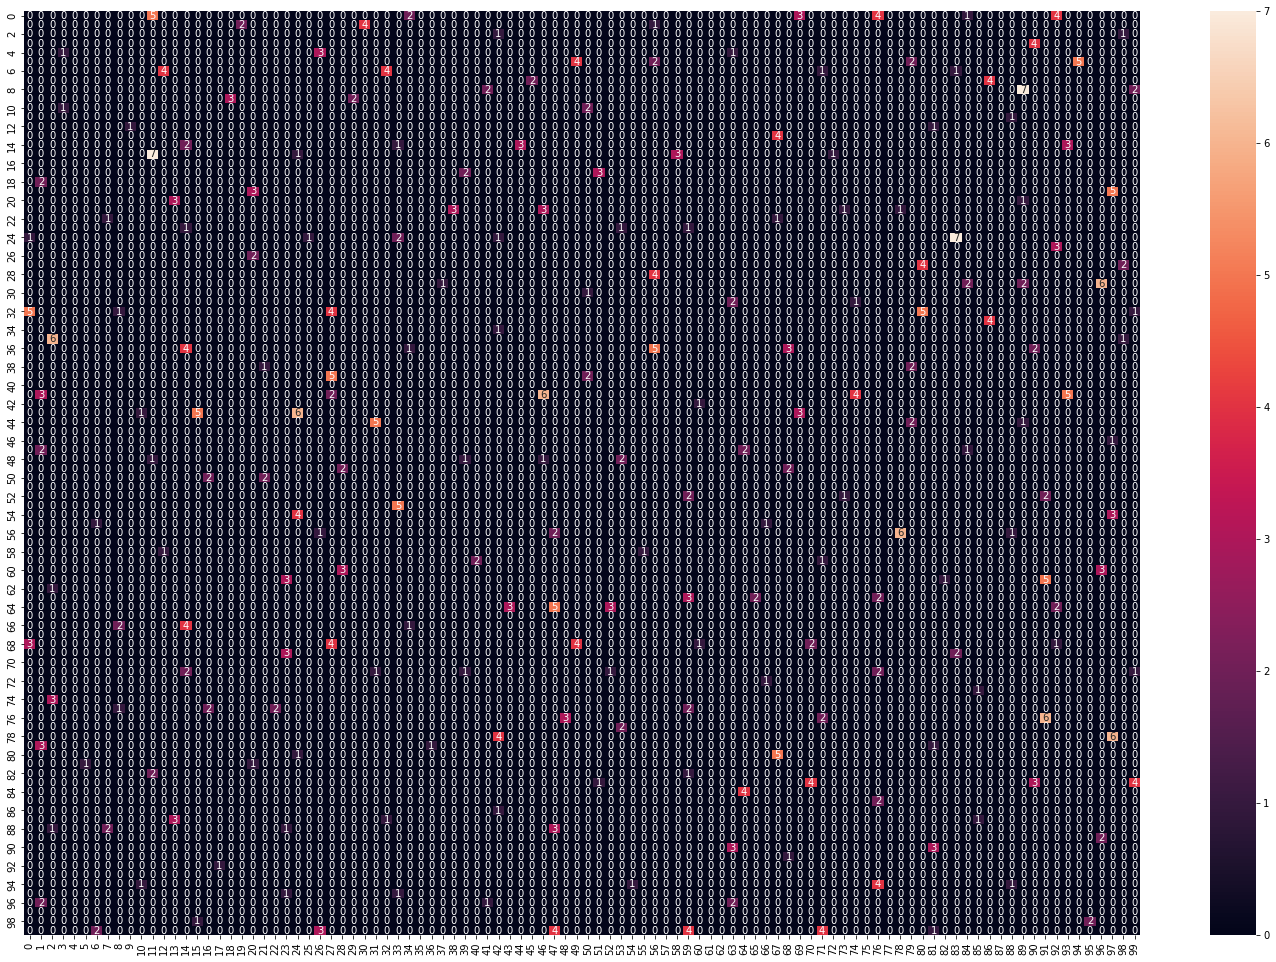

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25,17))
sns.heatmap(risk_levels, annot=True, fmt='g')
plt.show()

In [45]:
risk_levels.sum()

535.0

## Puzzle 2

In [46]:
basins = (data-8*np.ones((n+1,n+1))).clip(min=0)

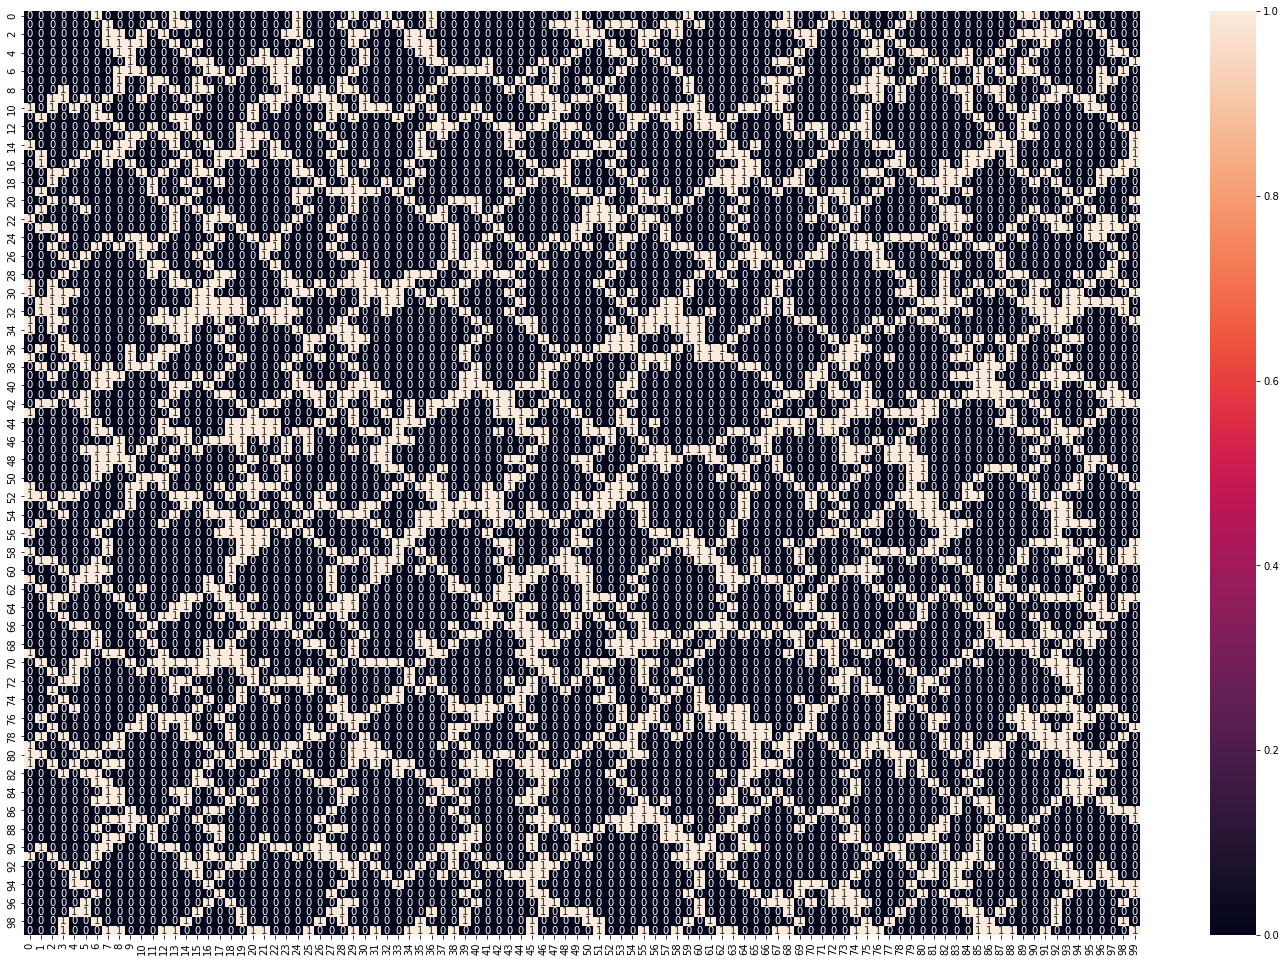

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25,17))
sns.heatmap(basins, annot=True, fmt='g')
plt.show()

## Internet solution

In [48]:
import math
groups = []
def count_groups(i, j):
    if j < 0 or j >= len(data) or i < 0 or i >= len(data[0]) or data[j][i] == 9 or data[j][i] == -1:
        return
    data[j][i] = -1
    groups[len(groups)-1] += 1
    count_groups(i+1, j)
    count_groups(i-1, j)
    count_groups(i, j+1)
    count_groups(i, j-1)

for i in range(0, len(data)):
    for j in range(0, len(data[0])):
        groups.append(0)
        count_groups(j, i)
print(math.prod(sorted(groups, reverse=True)[:3]))

1122700


# Day 10

## Puzzle 1

In [49]:
f = open('./inputs/day10/input','r')
data = f.read().split("\n")
data[0:5]

['[{{{{{<([({{<[<>()][{}()]>{<{}{}>{[]{}}}}{({{}{}][<>{}])(<<>()><{}<>>)}}<[<({}())<{}{}>>[[()[]](<>[])]]<(',
 '(<<({{({((([[{(){}}(<><>)][{[][]}<()()>>][[[()<>]<()()>]])))}(<(<[[{()<>}]({<>{}})]><<(<()[]>[[]{}])>[{{[',
 '<{<{({[<{<{([<<><>>[()[]]])[<{[]<>}<<>()>>]}{{<(()<>)<(){}>>(<[]<>>)}[<[()[]]<<>{}>>[{{}{}}[<><>]]>}>({',
 '[[[[[(<{(<<{<({}<>)<<><>>>{<<>()><<>()>]}<[<{}{}>{<>()}]<[{}[]][{}()]>>>[<({[]}{{}[]})<{<>{',
 '[[{[<(<(<(({{<{}()>{{}<>}}[<()[]><<>{}>]}(<[{}[]][{}[]]><<<>{}><()<>>])))>[[(({[{}[]][{}{}]}{<<>()>[(){}]']

In [50]:
openings = ['{','[','(','<']
endings = ['}',']',')','>']

In [51]:
faulty_signs = []
for line in data:
    current_openings = []
    for character in line:
        if character in openings:
            current_openings.append(character)
        if character in endings:
            if current_openings[-1]==openings[endings.index(character)]:
                current_openings.pop()
            else :
                print("Expected {} but found {}".format(endings[openings.index(current_openings[-1])], character))
                faulty_signs.append(character)
                break
print(faulty_signs)

Expected } but found ]
Expected ] but found >
Expected ] but found >
Expected } but found ]
Expected > but found ]
Expected ) but found >
Expected ) but found >
Expected > but found }
Expected ] but found )
Expected ] but found >
Expected ] but found )
Expected } but found >
Expected ) but found }
Expected ] but found >
Expected ] but found >
Expected ] but found )
Expected > but found ]
Expected ) but found ]
Expected ] but found >
Expected > but found )
Expected > but found )
Expected ) but found >
Expected > but found ]
Expected } but found >
Expected } but found )
Expected ] but found )
Expected ) but found }
Expected ) but found }
Expected } but found ]
Expected ] but found )
Expected ) but found >
Expected ) but found ]
Expected } but found ]
Expected ) but found }
Expected ] but found >
Expected } but found )
Expected } but found ]
Expected } but found ]
Expected ) but found >
Expected ] but found }
Expected ) but found }
Expected } but found ]
Expected } but found >
Expected } 

In [52]:
Total = 0
for sign in faulty_signs:
    if sign==")":
        Total += 3
    if sign=="}":
        Total += 1197
    if sign=="]":
        Total += 57
    if sign==">":
        Total += 25137
print(Total)

413733


## Puzzle 2

In [53]:
f = open('./inputs/day10/input','r')
data = f.read().split("\n")
faulty_signs = []
completion_strings = []
for line in data:
    status = "OK"
    current_openings = []
    for character in line:
        if character in openings:
            current_openings.append(character)
        if character in endings:
            if current_openings[-1]==openings[endings.index(character)]:
                current_openings.pop()
            else :
                # print("Expected {} but found {}".format(endings[openings.index(current_openings[-1])], character))
                faulty_signs.append(character)
                status = "corrupted"
                break
    if status=="OK" and len(current_openings)!=0:
        print("Left Open : {}".format(current_openings))
        completion_string = ""
        for missing_character in current_openings:
            completion_string = completion_string+str(endings[openings.index(missing_character)])
        completion_string = completion_string[::-1]
        completion_strings.append(completion_string)
        print(completion_string)

Left Open : ['<', '(', '[', '[', '<', '<', '(', '(', '[', '<', '(', '<', '<', '{']
}>>)>]))>>]])>
Left Open : ['<', '{', '{', '{', '[', '{', '[', '(', '(', '{', '<', '<', '<', '(', '[']
])>>>}))]}]}}}>
Left Open : ['{', '{', '<', '(', '{', '<', '<', '<', '{', '<', '(', '[', '<', '[']
]>])>}>>>})>}}
Left Open : ['[', '(', '[', '(', '[', '(', '<', '(', '(', '{', '{', '(', '<', '[']
]>)}}))>)])])]
Left Open : ['<', '[', '(', '(', '<', '[', '[', '{', '[', '<', '<', '{', '{', '[']
]}}>>]}]]>))]>
Left Open : ['<', '<', '<', '<', '<', '(', '{', '[', '{', '(', '{']
})}]})>>>>>
Left Open : ['[', '{', '{', '(', '<', '[', '{', '<', '<', '{', '(', '(', '{', '{', '{']
}}}))}>>}]>)}}]
Left Open : ['<', '[', '<', '{', '(', '<', '[', '(', '{', '(', '(', '[']
]))})]>)}>]>
Left Open : ['<', '<', '<', '{', '(', '<', '(', '<', '<', '[', '(', '(', '<', '[', '(']
)]>))]>>)>)}>>>
Left Open : ['[', '{', '(', '(', '[', '[', '(', '{', '[', '(', '<', '{', '<', '{']
}>}>)]})]]))}]
Left Open : ['{', '(', '<', '(',

In [54]:
def get_score(completion_strings):
    score = {")":1,"]":2,"}":3,">":4}
    score_table = []
    for completion_string in completion_strings:
        string_score = 0
        for character in completion_string:
            string_score = string_score*5 + score[character]
        score_table.append(string_score)
    score_table.sort()
    return(score_table)

In [55]:
score_table = get_score(completion_strings)
print(score_table[0:5])
print(len(score_table))
result = score_table[int((len(score_table)-1)/2)]
print(result)

[61247, 537211, 3515189, 9261484, 26951044]
47
3354640192


# Day 11

## Puzzle 1

In [67]:
f = open('./inputs/day11/input','r')
grid = np.array([list(x) for x in f.read().split("\n")]).astype(int)
grid

array([[7, 1, 4, 7, 7, 1, 3, 5, 5, 6],
       [6, 1, 6, 7, 7, 3, 3, 5, 5, 5],
       [5, 1, 8, 3, 4, 8, 2, 1, 1, 8],
       [3, 8, 8, 5, 4, 2, 4, 5, 2, 1],
       [7, 5, 3, 3, 6, 4, 4, 6, 1, 1],
       [3, 8, 7, 7, 7, 6, 4, 8, 6, 3],
       [7, 6, 3, 6, 8, 7, 4, 3, 3, 3],
       [8, 6, 8, 7, 1, 8, 8, 5, 3, 3],
       [7, 4, 6, 7, 1, 1, 5, 2, 6, 5],
       [1, 6, 2, 6, 5, 7, 3, 1, 3, 4]])

In [69]:
adj = [(i,j) for i in range(-1, 2) for j in range(-1,2) if i!=0 or j!=0]
window = {(i,j):grid[i][j] for i in range(10) for j in range(10)}
flashes = 0
i=0
previous = set()

while len(previous)<len(window):
    previous = set()
    window = {k:v+1 for k, v in window.items()}
    while True:
        if sum(v>9 for k,v in window.items() if k not in previous)==0:
            break

        for k,v in window.items():
            if k not in previous and v>9:
                previous.add(k)
                for ad in [(k[0]+i,k[1]+j) for i,j in adj if (k[0]+i,k[1]+j) in window]:
                    window[ad]+=1

    flashes+=len(previous)
    window.update({k:0 for k in previous})
    i+=1
    if i==100:
        print(f"Part 1: {flashes}")

print(f"Part 2: {i}")

Part 1: 1620
Part 2: 371


# Day 12

## Puzzle 1